# Całkowanie numeryczne

Całość kodu można znaleźć w formie online pod linkiem [github.com/KsawerySmoczynski/elementy-metod-numerycznych](https://github.com/KsawerySmoczynski/elementy-metod-numerycznych).

Jest on również dostępny [pod tym linkiem w wersji interaktywnej w Google Colab](https://colab.research.google.com/github/KsawerySmoczynski/elementy-metod-numerycznych/blob/master/Lab3/zmlab3_zadania_i_odpowiedzi.ipynb)  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> <a href="https://github.com/KsawerySmoczynski/elementy-metod-numerycznych/blob/master/Lab3/zmlab3_zadania_i_odpowiedzi"> 


In [1]:
# Żeby odpalić notebook na google colab będziemy musieli zainstalować potrzebne pakiety
import subprocess
import sys
import os

REQUIRED_PACKAGES = ["numpy", "matplotlib", "scipy", "sympy"]
RUN_IN_COLAB = "COLAB_JUPYTER_IP" in os.environ

def install(packages):
    subprocess.check_call([sys.executable, "-m", "pip", "install", *packages])

if RUN_IN_COLAB:
    install(REQUIRED_PACKAGES)

## Zadanie 1
Znajdź wartości powyższych całek używając funkcji inttrap (scipy.integrate.trapezoid) dla dwóch, trzech i 5 węzłów:

1. $\int_{0}^4 \frac{x}{x^2+12}dx$
2. $\int_0^{\frac{\pi}{2}}x^2\sin xdx$
3. $\int_1^{3}2^{x^2-3x+1}dx$

Oszacuj błąd otrzymanych przybliżeń.

In [2]:
from typing import Callable
import numpy as np
import scipy as sp


n = [2, 3, 5]
def trapezoid_n_integrations(f:Callable, a:float, b:float, n:list):
    ys = []
    for ni in n:
        x = np.linspace(a, b, ni)
        y = sp.integrate.trapezoid(f(x), x)
        ys.append(y)
    return ys

In [3]:
# 1
a = 0
b = 4
f = lambda x: x / (x*2 + 12)
trapezoid_n_integrations(f, a, b, n)

[0.4, 0.45, 0.4630952380952381]

In [4]:
# 2
a = 0
b = np.pi / 2 
f = lambda x: x**2*np.sin(x)
x = np.linspace(a, b)
trapezoid_n_integrations(f, a, b, n)

[1.9378922925187385, 1.3115203415716554, 1.1824792489570735]

In [5]:
# 3
a = 1
b = 3
f = lambda x: 2**(x**2 - 3*x + 1)
trapezoid_n_integrations(f, a, b, n)

[2.5, 1.75, 1.5056723114402857]

## Zadanie 2
(3 pkt) Napisz funkcję **Simpson**, która dla danej funkcji $f$ oraz liczb $a$, $b$ będacych krańcami pewnego przedziału i liczby naturalnej $N$ wylicza przybliżoną wartość całki $\int_a^b f(x)dx$ stosując złożoną kwadraturę Simpsona i podział przedziału $[a,b]$ na $N$ równych części.

In [6]:
def simpson(f, a, b, n):
    h = (b-a) / n
    x1 = np.full(n-1, a) + np.linspace(h, (n-1)*h, (n-1))
    x2 = np.r_[np.array([a]), x1.copy()] + h / 2
    return (h / 6) * (f(a) + 2 * np.sum(f(x1)) + 4 * np.sum(f(x2)) + f(b))

f = lambda x: x**1
simpson(f, 0, 2, 100)

2.0

## Zadanie 3
(2 pkt) Oblicz wartości poniższych całek, używając złożonych wzorów trapezów i Simpsona dla $N\in \{2,3,\ldots,10\}$. Oblicz błędy względne otrzymanych przybliżeń. Dla każdej z tych całek narysuj na jednym wykresie błędy otrzymane w wyniku stosowania obu tych wzorów w zależności od $N$. Zastosuj skalę logarytmiczną dla tych wartości. Dodaj tytuł i legendę do wykresów.
1. $\int_2^5 \frac{\ln\ln x}{x}dx$,
2. $\int_0^1\frac{1}{1+x^2}dx$.

In [7]:
import sympy
n = np.arange(2,11)

In [8]:
# 1
a = 2
b = 5
f = lambda x: np.log(np.log(x)) / x

x = sympy.Symbol('x')
sympy.integrate(sympy.log(sympy.log(x)) / x, x)

log(x)*log(log(x)) - log(x)

In [9]:
F = lambda x: np.log(x)*(np.log(np.log(x)) - 1)
true_x = F(b) - F(a)
true_x

0.10366401910379308

In [10]:
trapezoid_output = np.array(trapezoid_n_integrations(f, a, b, n))
trapezoid_errors = np.abs(trapezoid_output - true_x)
trapezoid_errors

array([0.23578321, 0.07314441, 0.03469591, 0.02006387, 0.01302358,
       0.00911791, 0.00673296, 0.00517234, 0.0040964 ])

In [11]:
simpson_output = np.array([simpson(f, a, b, ni) for ni in n])
simpson_errors = np.abs(simpson_output - true_x)
simpson_errors

array([2.37035818e-03, 5.91911016e-04, 2.08490445e-04, 9.04579457e-05,
       4.51431635e-05, 2.49069766e-05, 1.48179545e-05, 9.34806168e-06,
       6.18034620e-06])

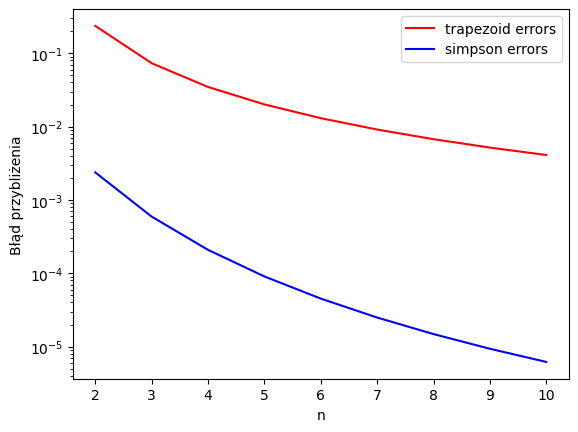

In [12]:
import matplotlib.pyplot as plt

fix, ax = plt.subplots()
ax.plot(n, trapezoid_errors, c="r", label="trapezoid errors")
ax.plot(n, simpson_errors, c="b", label="simpson errors")
ax.set_xlabel("n")
ax.set_ylabel("Błąd przybliżenia")
# ax.set_xscale("log")
ax.set_yscale("log")
# ax.set_xticks(h)
ax.legend()
plt.show()

2. $\int_0^1\frac{1}{1+x^2}dx$.

In [13]:
# 2
a = 0
b = 1
f = lambda x: 1/ (1 + x**2)

x = sympy.Symbol('x')
sympy.integrate(1 / (1 + x ** 2), x)

atan(x)

In [14]:
F = lambda x: np.arctan(x)
true_x = F(b) - F(a)
true_x

0.7853981633974483

In [15]:
trapezoid_output = np.array(trapezoid_n_integrations(f, a, b, n))
trapezoid_errors = np.abs(trapezoid_output - true_x)
trapezoid_errors

array([0.03539816, 0.01039816, 0.00462893, 0.00260405, 0.00166663,
       0.0011574 , 0.00085034, 0.00065104, 0.0005144 ])

In [16]:
simpson_output = np.array([simpson(f, a, b, ni) for ni in n])
simpson_errors = np.abs(simpson_output - true_x)
simpson_errors

array([6.00653470e-06, 2.18163438e-07, 3.77827716e-08, 9.91264448e-09,
       3.32110339e-09, 1.31728461e-09, 5.91242832e-10, 2.91656033e-10,
       1.55002011e-10])

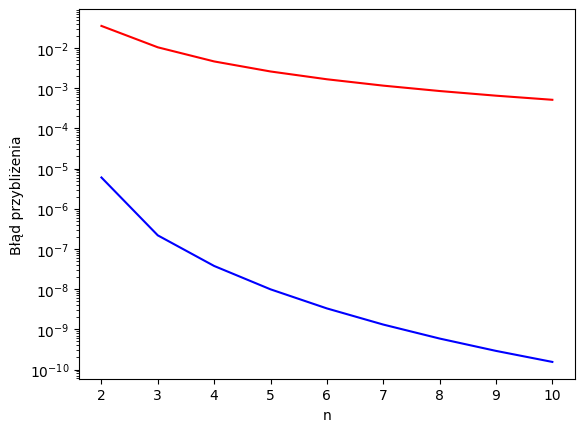

In [17]:
import matplotlib.pyplot as plt

fix, ax = plt.subplots()
ax.plot(n, trapezoid_errors, c="r", label="trapezoid errors")
ax.plot(n, simpson_errors, c="b", label="simpson errors")
ax.set_xlabel("n")
ax.set_ylabel("Błąd przybliżenia")
# ax.set_xscale("log")
ax.set_yscale("log")
# ax.set_xticks(h)
plt.show()

# Rozwiązywanie równań nieliniowych

## Zadanie 1
(3 pkt) Napisz funkcję **bisekcja**, która dla danych punktów $a,b$, funkcji $f$ i parametrów związanych z kryteriami stopu $M,\delta,\varepsilon$ znajduje przybliżenie zera tej funkcji w przedziale $[a,b]$ metodą bisekcji.

In [18]:
def bisekcja(f:Callable[[float], float], a:float, b:float, M:int, delta:float, epsilon:float) -> float:
    y = a
    z = b
    x_k = float("inf")
    for n in range(M+1):
        x_k1 = (y + z) / 2
        if f(x_k1)*f(y) < 0:
            z = x_k1
        elif f(x_k1)*f(z) < 0:
            y = x_k1
        if abs(f(x_k1)) < delta or abs(x_k-x_k1) < epsilon:
            break
        x_k = x_k1
    return x_k1, n

f = lambda x: x + 1
a = -5
b = 2
M = 10
delta = 1e-20
epsilon = 1e-20

bisekcja(f, a, b, M, delta, epsilon)

(-0.99755859375, 10)

## Zadanie 2

(3 pkt) Napisz funkcję **styczne**, która dla danego punktu $x_0$, funkcji $f$ i parametrów związanych z kryteriami stopu $M,\delta,\varepsilon$ znajduje przybliżenie zera tej funkcji metodą Newtona.

In [19]:
def styczna(f: Callable[[float], float], x_0:float, M:int, delta:float, epsilon:float, f_prime: Callable[[float], float] = None) -> float:
    def _get_f_prime():
        sympy_f_prime = sympy.diff(f(sympy.Symbol("x")))
        return lambda x: float(sympy_f_prime.evalf(subs={"x": x}))
    f_prime = f_prime or _get_f_prime()
    
    x_k = x_0
    for n in range(M+1):
        # try:
        x_k1 = x_k - f(x_k) /  f_prime(x_k)
        # except ZeroDivisionError:
        #     # if derivative is equal to 0 we will divide by zero, let's move away a bit
        #     x_k += np.sign(x_k) * epsilon
        #     continue
        if abs(f(x_k1)) < delta or abs(x_k-x_k1) < epsilon:
            break
        x_k = x_k1
    
    return x_k1, n

f = lambda x: x ** 2 - 4
f_prime = lambda x: 2*x
x_0 = 0.1
M = 100
delta = 1e-20
epsilon = 1e-2

styczna(f, x_0, M, delta, epsilon, f_prime)
# Metoda jest niestabilna

(2.0000109257780436, 6)

## Zadanie 3
(3 pkt) Napisz funkcję **sieczne**, która dla danych punktów $x_0,x_1$, funkcji $f$ i parametrów związanych z kryteriami stopu $M,\delta,\varepsilon$ znajduje przybliżenie zera tej funkcji metodą siecznych.

In [20]:
def sieczna(f:Callable[[float], float], x_0:float, x_1:float, M:int, delta:float, epsilon:float) -> float:
    # TODO https://pl.wikipedia.org/wiki/Metoda_siecznych#Modyfikacja 
    if f(x_0) == f(x_1):
        raise ValueError("Function value for x_0 and x_1 is equal, adjust values")
    x_k_1 = x_0
    x_k = x_1
    for n in range(M+1):
        f_k = f(x_k)
        f_k_1 = f(x_k_1)
        # if f_k * f_k_1 > 0:
        #     raise ArithmeticError("Method won't converge")
        x_k1 = x_k - ((x_k - x_k_1) / (f_k - f_k_1)) * f_k
        x_k_1 = x_k
        x_k = x_k1
        if abs(f(x_k)) < delta or abs(x_k_1-x_k) < epsilon:
            break
    return x_k1, n

f = lambda x: x ** 2 - 4
x_0 = 3
x_1 = 2
M = 10
delta = 1e-5
epsilon = 1e-5

sieczna(f, x_0, x_1, M, delta, epsilon)

(2.0, 0)

## Zadanie 4
(2 pkt) Znajdź przybliżoną wartość $\sqrt[4]{4}$ stosując metody bisekcji, stycznych i siecznych z dokładnością $\varepsilon\in\{2^{-5},2^{-6},\ldots,2^{-15}\}$. Porównaj szybkość zbieżności (liczbę iteracji) potrzebnych do uzyskania zadowalającego przybliżenia w zależności od $\varepsilon$. Przedstaw wyniki na wykresie. Do wykresu dodaj tytuł i legendę.

In [21]:
epsilons = np.power(2., -np.arange(5, 16))

f = lambda x: x ** 2 - 2
f_prime = lambda x: 2*x

x_0 = 0.1
x_1 = 2 * 4 ** (1/4) - 0.1 # równoodległe oba punkty od docelowego
M = 30
delta = np.finfo(np.float32).eps # minimalna mozliwa delta, aby warunkiem stopu bylo albo M albo epsilon

bisekcje = []
styczne = []
sieczne = []
for epsilon in epsilons:
    bisekcje.append(bisekcja(f, x_0, x_1, M, delta, epsilon))
    # print("bisekcja")
    styczne.append(styczna(f, x_0, M, delta, epsilon, f_prime))
    # print("styczna")
    sieczne.append(sieczna(f, x_0, x_1, M, delta, epsilon))
    # print("sieczna")
    print(f"Epsilon {epsilon:.5f} done")


Epsilon 0.03125 done
Epsilon 0.01562 done
Epsilon 0.00781 done
Epsilon 0.00391 done
Epsilon 0.00195 done
Epsilon 0.00098 done
Epsilon 0.00049 done
Epsilon 0.00024 done
Epsilon 0.00012 done
Epsilon 0.00006 done
Epsilon 0.00003 done


In [22]:
np.min(np.array(bisekcje)[:,:1]), np.max(np.array(bisekcje)[:,:1]), np.std(np.array(bisekcje)[:,:1])

(1.4142135623730951, 1.4142135623730951, 2.220446049250313e-16)

In [23]:
np.min(np.array(styczne)[:,:1]), np.max(np.array(styczne)[:,:1]), np.std(np.array(styczne)[:,:1])

(1.4142136001158032, 1.4145403301286927, 9.3928274606096e-05)

In [24]:
np.min(np.array(sieczne)[:,:1]), np.max(np.array(sieczne)[:,:1]), np.std(np.array(sieczne)[:,:1])

(1.4140706642437686, 1.4142138625853127, 6.37250464292563e-05)

In [25]:
n_bisekcje = np.array(bisekcje)[:, 1] 
n_styczne = np.array(styczne)[:, 1]
n_sieczne = np.array(sieczne)[:, 1]
n_bisekcje, n_styczne, n_sieczne

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([5., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6.]),
 array([4., 4., 4., 5., 5., 5., 5., 5., 6., 6., 6.]))

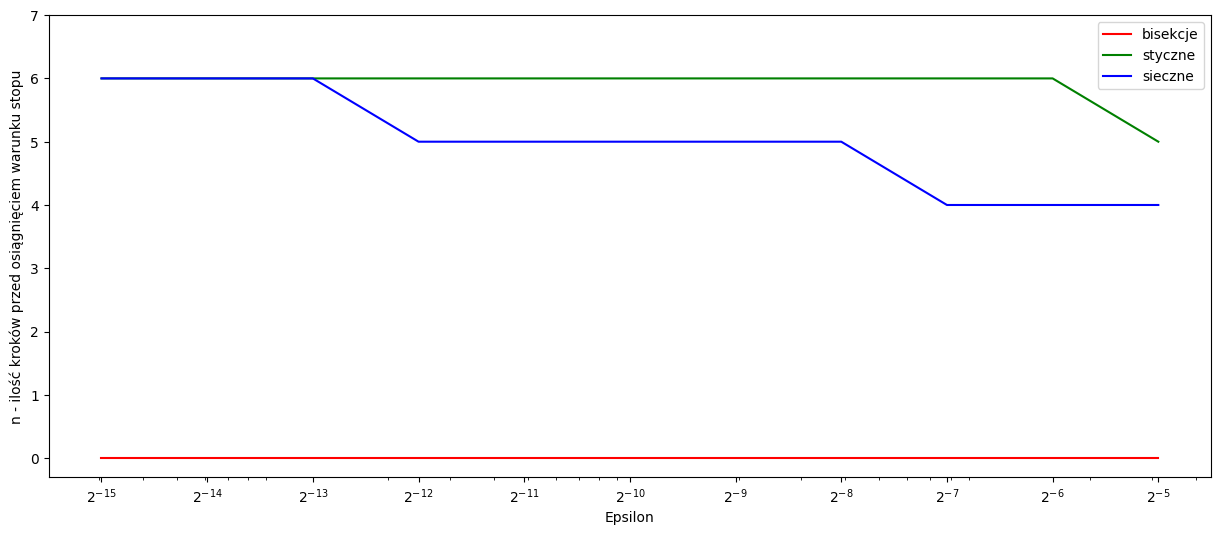

In [26]:
import matplotlib.pyplot as plt

fix, ax = plt.subplots(figsize=(15, 6))
ax.plot(epsilons, n_bisekcje, c="r", label="bisekcje")
ax.plot(epsilons, n_styczne, c="g", label="styczne")
ax.plot(epsilons, n_sieczne, c="b", label="sieczne")
ax.set_xlabel("Epsilon")
ax.set_ylabel("n - ilość kroków przed osiągnięciem warunku stopu")
ax.set_xscale("log")
ax.legend()
ax.set_yticks(np.arange(0, np.concatenate([n_bisekcje, n_sieczne, n_styczne]).max()+2))
ax.set_xticks(list(reversed(epsilons)))
ax.set_xticklabels([fr"$2^{{{j:.0f}}}$" for j in reversed(np.log2(epsilons))])
plt.show()

In [29]:
x_1 = 10

bisekcje = []
styczne = []
sieczne = []
for epsilon in epsilons:
    bisekcje.append(bisekcja(f, x_0, x_1, M, delta, epsilon))
    # print("bisekcja")
    styczne.append(styczna(f, x_0, M, delta, epsilon, f_prime))
    # print("styczna")
    sieczne.append(sieczna(f, x_0, x_1, M, delta, epsilon))
    # print("sieczna")
    print(f"Epsilon {epsilon:.5f} done")


n_bisekcje = np.array(bisekcje)[:, 1] 
n_styczne = np.array(styczne)[:, 1]
n_sieczne = np.array(sieczne)[:, 1]
n_bisekcje, n_styczne, n_sieczne

Epsilon 0.03125 done
Epsilon 0.01562 done
Epsilon 0.00781 done
Epsilon 0.00391 done
Epsilon 0.00195 done
Epsilon 0.00098 done
Epsilon 0.00049 done
Epsilon 0.00024 done
Epsilon 0.00012 done
Epsilon 0.00006 done
Epsilon 0.00003 done


(array([ 8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18.]),
 array([5., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6.]),
 array([6., 7., 7., 7., 7., 8., 8., 8., 8., 8., 8.]))

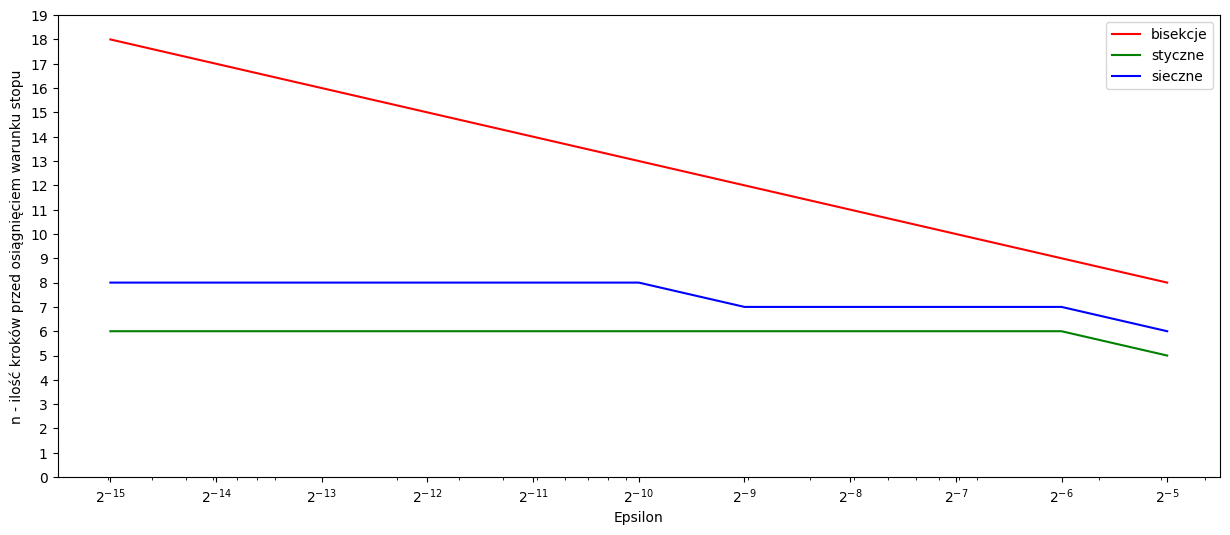

In [30]:
import matplotlib.pyplot as plt

fix, ax = plt.subplots(figsize=(15, 6))
ax.plot(epsilons, n_bisekcje, c="r", label="bisekcje")
ax.plot(epsilons, n_styczne, c="g", label="styczne")
ax.plot(epsilons, n_sieczne, c="b", label="sieczne")
ax.set_xlabel("Epsilon")
ax.set_ylabel("n - ilość kroków przed osiągnięciem warunku stopu")
ax.set_xscale("log")
ax.legend()
ax.set_yticks(np.arange(0, np.concatenate([n_bisekcje, n_sieczne, n_styczne]).max()+2))
ax.set_xticks(list(reversed(epsilons)))
ax.set_xticklabels([fr"$2^{{{j:.0f}}}$" for j in reversed(np.log2(epsilons))])
plt.show()

Jak widać szybkość osiągnięcia wlaściwego x dla algorytmu bisekcji i siecznych zalezy od wybranego przedzialu.